In [1]:
import os
import cv2
import sys
import numpy as np
import imageio.v2 as io
import scipy.io as sio
from skimage import color
import matplotlib.pyplot as plt
from natsort import natsorted
%matplotlib inline

import multiprocessing as mp
import os

from PIV_utils_tg import worker, PIV_single_test, list_png_files

./test_data/Left/L_00001.png
50
<class 'dict'>
(446, 278)


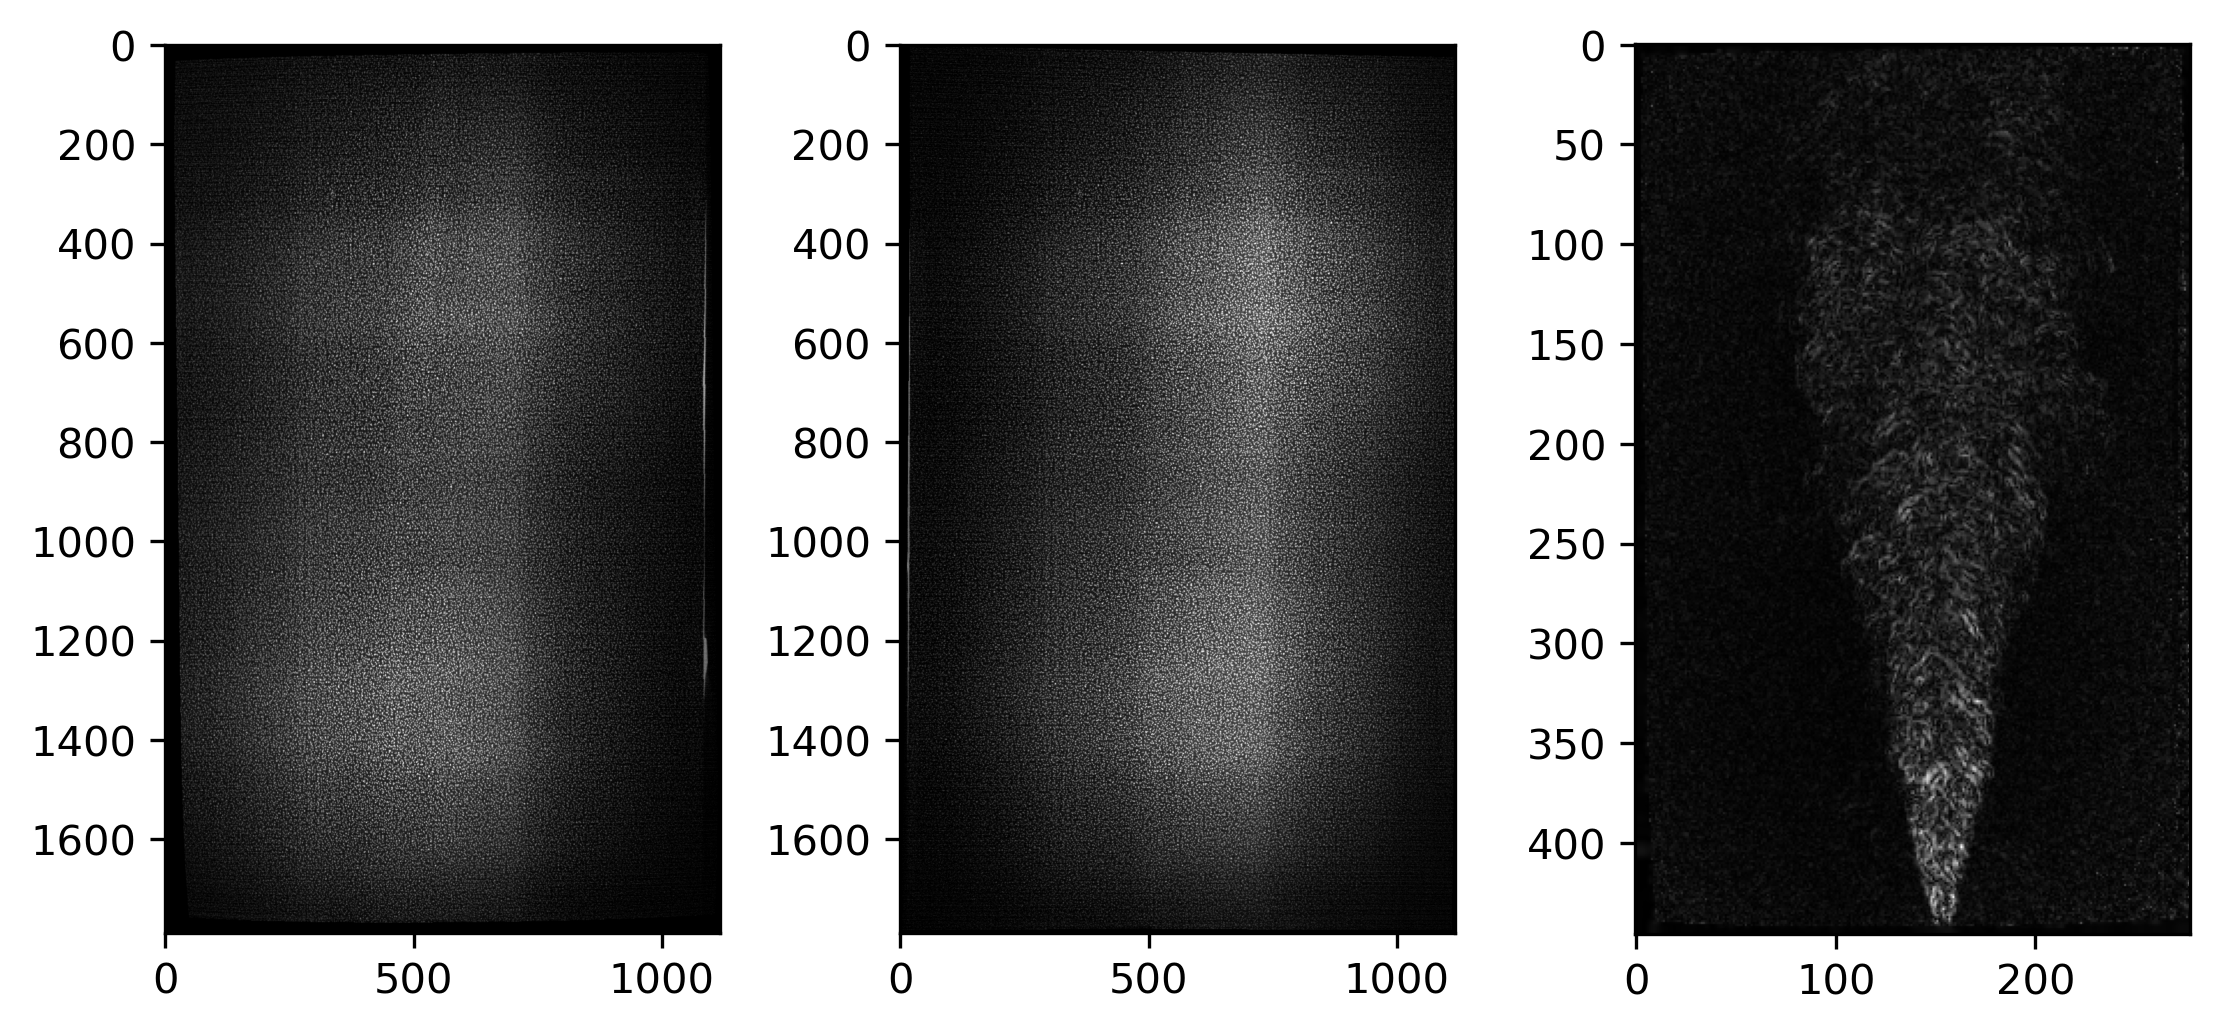

100%|██████████| 23/23 [01:14<00:00,  3.22s/it]


Shifts/test_data/13a_b1.mat

Shifts/test_data/13a_b0.mat



In [2]:
# PIV parameters:
params = {
    'mask': None,
    'window_size_iters': ((64, 1),(32, 1), (16, 1),(8, 2)) ,
    'overlap_ratio': 0.5,
    'dt': 1,
    'num_validation_iters': 2,
    'validation_method': 'median_velocity',
}

dist = 13

im_loc = './'
gen_loc = './results/'

batch_n = 2

file_names = ['test_data']

mp.set_start_method("spawn")  # important for CUDA

for fname in file_names:

    side1_1, side2_1, D1, batch_s, directory_l, directory_r, png_files_l, png_files_r, PIV_mask = PIV_single_test(batch_n, gen_loc, im_loc, fname, params)
    
    index_range = (1, batch_s)
    batch_range = (0,batch_n)
    
    batch_range1 = (0,int(batch_n/2))
    batch_range2 = (int(batch_n/2),batch_n)
    
    cnt1 = 1
    cnt2 = 1 + int((batch_s-1)*batch_n/2)
    
    with mp.Pool(processes=2) as pool:
        pool.starmap(worker, [(0, cnt1, batch_range1, index_range, batch_s, D1, directory_l, directory_r, png_files_l, png_files_r,
                                         gen_loc, dist, fname, side1_1, side2_1, params, PIV_mask),
                                       (1, cnt2, batch_range2, index_range, batch_s, D1, directory_l, directory_r, png_files_l, png_files_r,
                                         gen_loc, dist, fname, side1_1, side2_1, params, PIV_mask)])